In [16]:
from typing import Union

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.base import clone, BaseEstimator

In [2]:
# load the mnist dataset
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy().astype(np.uint8)

print(f"Shape of independent variable: {X.shape}")
print(f"Shape of dependent variable:   {y.shape}")

Shape of independent variable: (70000, 784)
Shape of dependent variable:   (70000,)


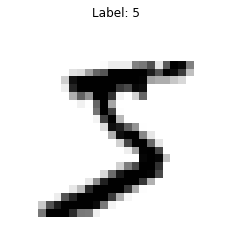

In [4]:
some_digit       = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.title(f"Label: {y[0]}")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# True for all 5s, False for all other digits
y_train_5 = (y_train == 5)
y_test_5  = (y_test  == 5)

In [6]:
# create a sgd classifier model and train it
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5, )

# now prediction time
sgd_clf.predict([some_digit])

array([ True])

In [7]:
# cross validation
skfolds = StratifiedKFold(n_splits=3)
    
for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold   = X_train[test_index]
    y_test_fold   = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred    = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96215
0.94995
0.9673


In [8]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [9]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

## Parametric Experiment

In [12]:
sgd_clf = SGDClassifier(random_state=42)

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [14]:
print(y_train_5.shape)
print(X_train.shape)
y_scores.shape

(60000,)
(60000, 784)


(60000,)

In [17]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

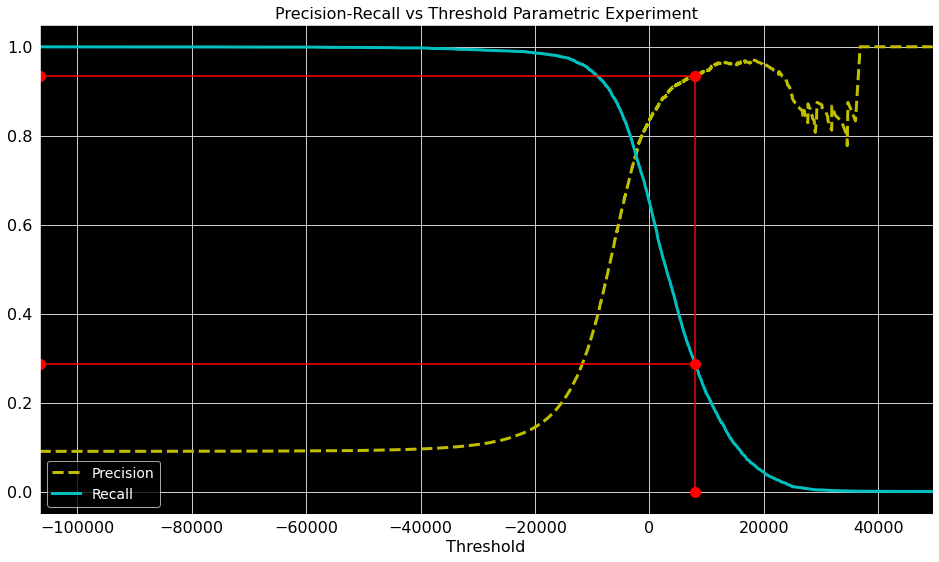

In [85]:
from matplotlib import style


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    with plt.style.context('dark_background'):
        plt.plot(thresholds, precisions[:-1], "y--", linewidth=3, label="Precision")
        plt.plot(thresholds, recalls[:-1], "c-", linewidth=3, label="Recall")

        threshold_index = np.argwhere(thresholds >= 8000)[0][0]
        x_value = thresholds[threshold_index]
        precision_value = precisions[threshold_index]
        recall_value = recalls[threshold_index]

        plt.plot([x_value, x_value], [0, precision_value], "r-o", markersize=10)
        plt.plot([thresholds.min(), x_value], [precision_value, precision_value], "r-o", markersize=10)
        plt.plot([thresholds.min(), x_value], [recall_value, recall_value], "r-o", markersize=10)

        plt.xlabel("Threshold", fontsize=16, color="black")
        plt.xticks(color="black", fontsize=16)
        plt.yticks(color="black", fontsize=16)
        plt.xlim(thresholds.min(), thresholds.max())
        plt.title("Precision-Recall vs Threshold Parametric Experiment", fontsize=16, color="black")
        plt.grid()
        plt.legend(fontsize=14)

plt.figure(figsize=(16, 9))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()